In [1]:
import seaborn  as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
internet.drop(columns='Country Code',inplace=True)

In [5]:
internet

,Country Name,Birth rate,Internet users,Income Group
0,Aruba,10.244,78.9,High income
1,Afghanistan,35.253,5.9,Low income
2,Angola,45.985,19.1,Upper middle income
3,Albania,12.877,57.2,Upper middle income
4,United Arab Emirates,11.044,88.0,High income
...,...,...,...,...
190,"Yemen, Rep.",32.947,20.0,Lower middle income
191,South Africa,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",42.394,2.2,Low income
193,Zambia,40.471,15.4,Lower middle income


In [6]:
internet.isnull().sum()

Country Name      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [7]:
internet.dtypes

Country Name       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [8]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [9]:
internet.dtypes

Country Name      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [10]:
internet.columns

Index(['Country Name', 'Birth rate', 'Internet users', 'Income Group'], dtype='object')

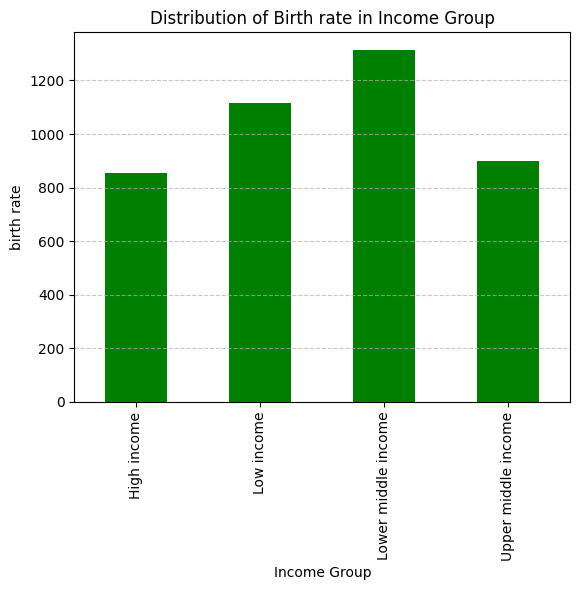

In [11]:
income_birth_rate = internet.groupby(['Income Group'])['Birth rate'].sum()
income_birth_rate.plot(kind='bar',color='Green')

plt.ylabel('birth rate')
plt.xlabel('Income Group')
plt.title('Distribution of Birth rate in Income Group')
plt.grid(axis='y',linestyle='--', alpha=0.7)

plt.show()

<h2>Top 5 Countries<h2>
<ol>
    <li>Iceland</li>
    <li>Bermuda</li>
    <li>Norway</li>
    <li>Sweden</li>
    <li>Denmark</li>
<ol>

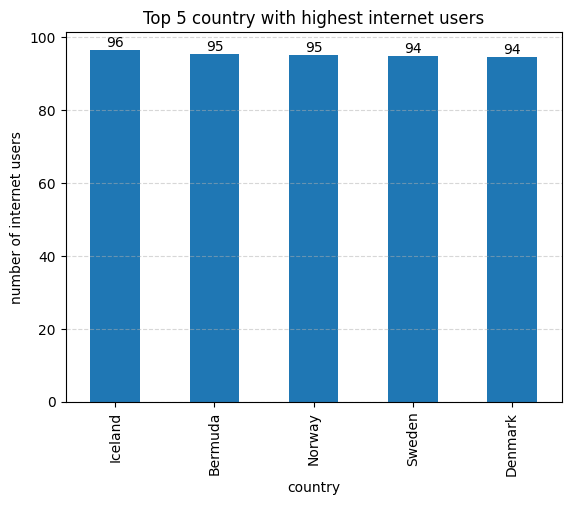

In [12]:

top_5 = internet.groupby(['Country Name'])['Internet users'].sum().nlargest(5)
top_5.plot(kind='bar')

for index, value in enumerate(top_5):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')

plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.ylabel('number of internet users')
plt.xlabel('country')
plt.title('Top 5 country with highest internet users')
plt.show()


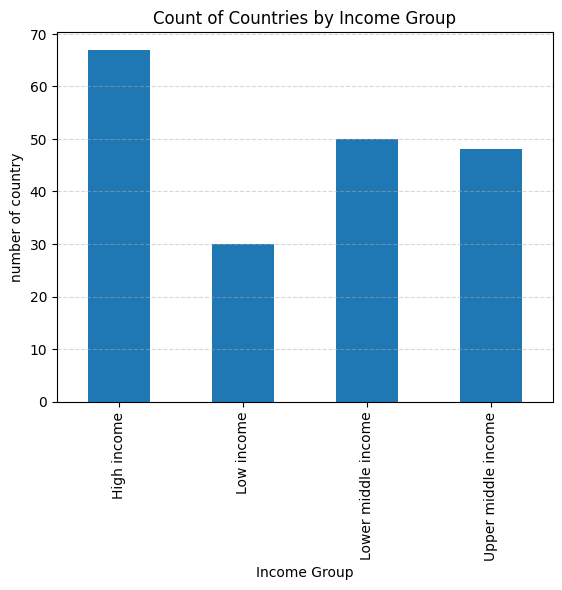

In [13]:
count_income = internet.groupby(['Income Group'])['Country Name'].count()
count_income.plot(kind='bar')
plt.title('Count of Countries by Income Group')
plt.ylabel('number of country')
plt.xlabel('Income Group')
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

In [14]:
internet.dtypes

Country Name      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

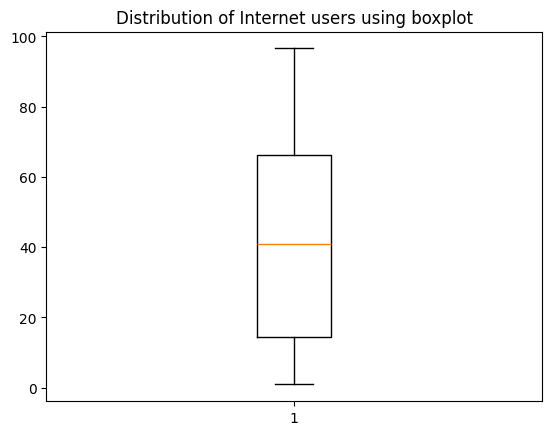

In [15]:
internet_user = internet['Internet users']
plt.boxplot(internet_user)
plt.title('Distribution of Internet users using boxplot')
plt.show()

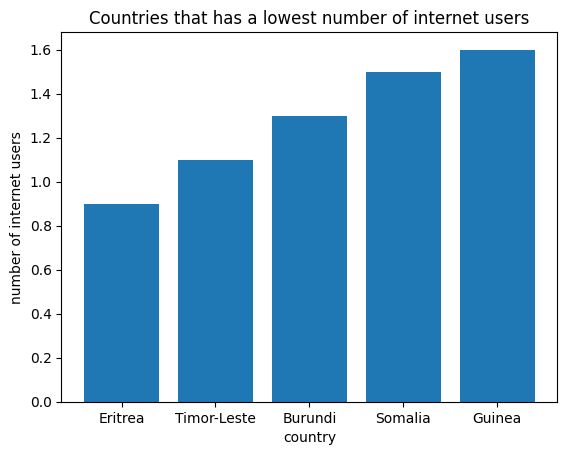

In [16]:
low_no_internet = internet.groupby(['Country Name'])['Internet users'].sum().nsmallest()
plt.bar(low_no_internet.index, low_no_internet.values)
plt.title('Countries that has a lowest number of internet users')
plt.ylabel('number of internet users')
plt.xlabel('country')
plt.show()

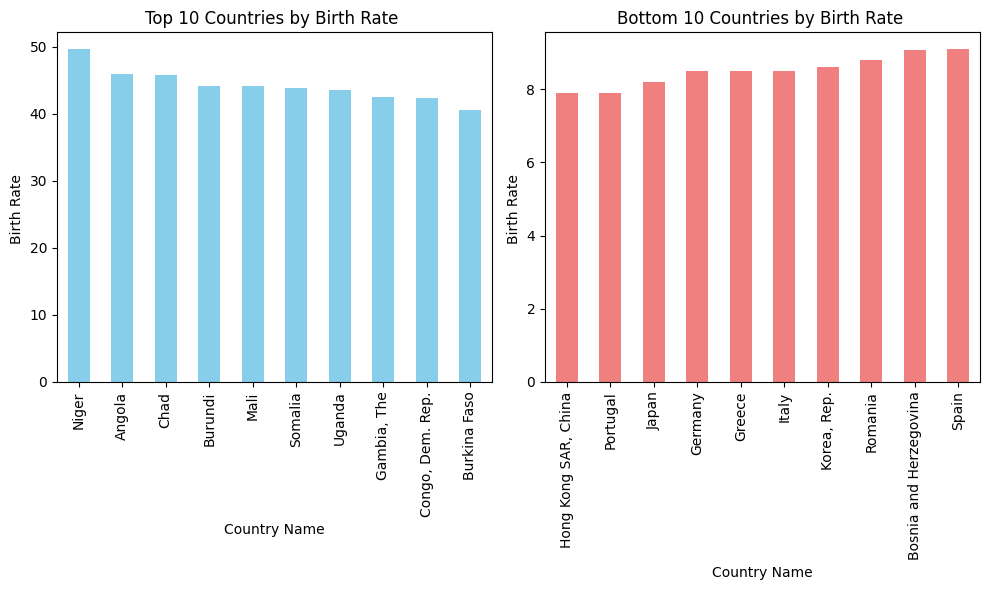

In [17]:

birth_rate_country = internet.groupby(['Country Name'])['Birth rate'].mean()


top_10 = birth_rate_country.nlargest(10)  
bottom_10 = birth_rate_country.nsmallest(10) 

plt.figure(figsize=(10, 6))  

plt.subplot(1, 2, 1)  
top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Birth Rate ')
plt.xlabel('Country Name')
plt.ylabel('Birth Rate ')

plt.subplot(1, 2, 2)  
bottom_10.plot(kind='bar', color='lightcoral')
plt.title('Bottom 10 Countries by Birth Rate ')
plt.xlabel('Country Name')
plt.ylabel('Birth Rate ')

plt.tight_layout()  
plt.show()


<h2>Average Birth Rate across all countries: 21.47<h2>

In [18]:

average_birth_rate = internet['Birth rate'].mean()

print(f"Average Birth Rate across all countries: {average_birth_rate:.2f}")


Average Birth Rate across all countries: 21.47


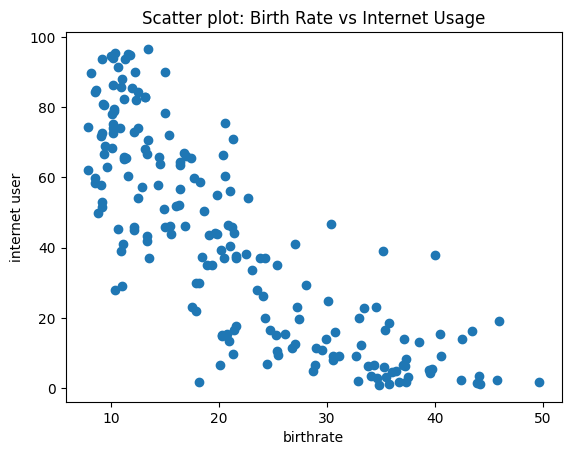

In [19]:
birt_rate = internet['Birth rate']
usage_internet = internet['Internet users']
plt.xlabel('birthrate')
plt.ylabel('internet user')
plt.scatter(x=birt_rate,y=usage_internet)
plt.title('Scatter plot: Birth Rate vs Internet Usage')
plt.show()

<h2>Countries with birth rate above 40<h2>
<ul>
  <li>Angola</li>
  <li>Burkina Faso</li>
  <li>Burundi</li>
  <li>Chad</li>
  <li>Congo, Dem. Rep.</li>
  <li>Gambia, The</li>
  <li>Mali</li>
  <li>Niger</li>
  <li>Nigeria</li>
  <li>Somalia</li>
  <li>Uganda</li>
  <li>Zambia</li>
</ul>

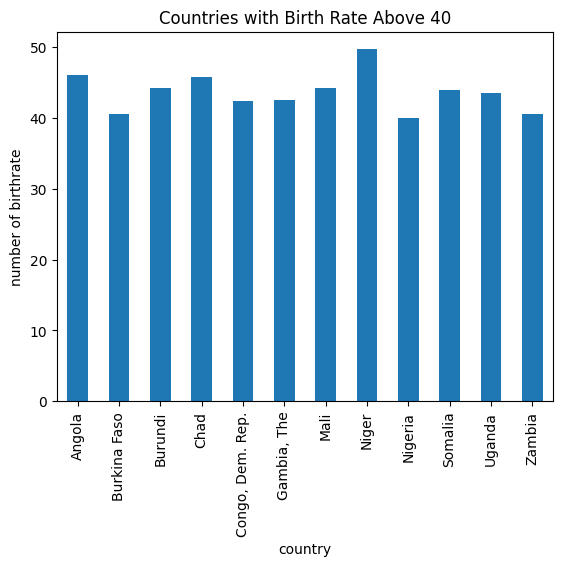

In [20]:
birth_count_40 = internet.groupby(['Country Name'])['Birth rate'].sum()
birth_count_40 = birth_count_40[birth_count_40 >= 40]

birth_count_40.plot(kind='bar')
plt.title('Countries with Birth Rate Above 40')
plt.xlabel('country')
plt.ylabel('number of birthrate')
plt.show()

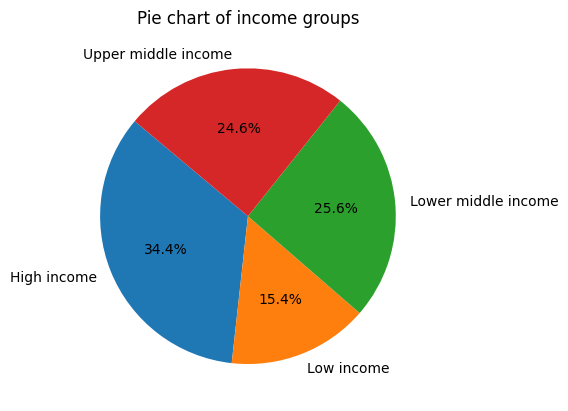

In [21]:
income_count = internet.groupby(['Income Group'])['Country Name'].count()
plt.pie(income_count,labels=income_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of income groups')
plt.show()

In [22]:
correlation_b_i = internet['Birth rate'].corr(internet['Internet users'])
correlation_b_i

np.float64(-0.8155885551284765)

<h2>Overall correlation of birth rate and internet user<h2>
<h3>The data reveals a strong negative correlation of -0.816 between birth rate and internet users, indicating that higher birth rates are associated with lower percentages of internet users across countries. This suggests that an increase in birth rate does not correspond to higher internet usage.<h3>

In [23]:
correlation_b_i = internet['Birth rate'].corr(internet['Internet users'])
correlation_b_i

np.float64(-0.8155885551284765)